In [1]:
import pandas as pd
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import numpy as np


In [2]:
data = pd.read_csv(r'C:\Users\Paul Urias\Visual Studio Code\Data Cience\ADS Capston\spacex_launch_dash.csv')
data.head()

,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [3]:
launch_sites = data['Launch Site'].unique().tolist()
launch_sites = ['All Sites'] + launch_sites
launch_sites

['All Sites', 'CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40']

## TASK 1: Add a Launch Site Drop-down Input Component

In [4]:
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1('SpaceX Launch Records Dashboard', 
        style={'textAlign': 'center', 'color': 'Red','font-size': 24}),

        dcc.Dropdown(id='Launch sites dropdown',
                     options=[
                         {'label': i, 'value': i} for i in launch_sites],#label es lo que ve el usuario en el dropdown
                     placeholder= 'Select a Site'), # ...continuacion...y value es como el nomnre de la variable donde se guarda lo elegido
        

        dcc.RangeSlider(id='payload-slider',
                min=0, max=10000, step=1000,
                marks={0: '0',10000: '10000'},
                value=[0, 10000],
                tooltip={"placement": "bottom", "always_visible": True}),
        
        html.Div([html.Div(id='graphs', className='chart-grid', style={'display': 'flex'})]),
        html.Div([html.Div(id='success-pie-chart', className='chart-grid', style={'display': 'flex'})])
        ])

@app.callback(
    Output(component_id='graphs', component_property='children'),
    Input(component_id='Launch sites dropdown', component_property='value'))

def make_graphics(dropdown_picked):
    if dropdown_picked == launch_sites[0]:
        succes_rate_total = data.groupby('Launch Site')['class'].mean().reset_index()
        All_chart = dcc.Graph(
            figure = px.pie(succes_rate_total,
                            values='class',
                            names='Launch Site',
                            title='All Sites Launches Succes Rate'))
        return html.Div(className='chart-item', children=html.Div(children=All_chart))
    
    elif dropdown_picked == launch_sites[1]:
        data_site = data[data['Launch Site'] == dropdown_picked]
        rates = data_site['class'].value_counts().reset_index()
        chart1 = dcc.Graph(
            figure = px.pie(rates, 
                            values='count', 
                            names='class',
                            title= f'{dropdown_picked} Succes and failure Rates'))
        return html.Div(className='chart-item', children=html.Div(children= chart1))
    
    elif dropdown_picked == launch_sites[2]:
        data_site = data[data['Launch Site'] == dropdown_picked]
        rates = data_site['class'].value_counts().reset_index()
        chart2 = dcc.Graph(
            figure = px.pie(rates, 
                            values='count', 
                            names='class',
                            title= f'{dropdown_picked} Succes and failure Rates'))
        return html.Div(className='chart-item', children=html.Div(children= chart2))
    
    elif dropdown_picked == launch_sites[3]:
        data_site = data[data['Launch Site'] == dropdown_picked]
        rates = data_site['class'].value_counts().reset_index()
        chart3 = dcc.Graph(
            figure = px.pie(rates, 
                            values='count', 
                            names='class',
                            title= f'{dropdown_picked} Succes and failure Rates'))
        return html.Div(className='chart-item', children=html.Div(children= chart3))
        
    elif dropdown_picked == launch_sites[4]:
        data_site = data[data['Launch Site'] == dropdown_picked]
        rates = data_site['class'].value_counts().reset_index()
        chart4 = dcc.Graph(
            figure = px.pie(rates, 
                            values='count', 
                            names='class',
                            title= f'{dropdown_picked} Succes and failure Rates'))
        return html.Div(className='chart-item', children=html.Div(children= chart4))
    

@app.callback(
    Output(component_id='success-pie-chart', component_property='children'), 
    [Input(component_id='Launch sites dropdown', component_property='value'), 
     Input(component_id='payload-slider', component_property='value')])

def make_scatter_range(dropdown_picked, range_payload): 
    lower, higher = range_payload
    if dropdown_picked == launch_sites[0]:
        chart5 = dcc.Graph(
            figure= px.scatter(data, 
                               x= 'Payload Mass (kg)', y= 'class',
                               range_x= [lower, higher],
                               color="Booster Version Category",
                               width=1600, height=500,
                               title='Correlation between Payload and Success for all Sites'))
        return html.Div(className='chart-item', children=html.Div(children= chart5))
    
    elif dropdown_picked != launch_sites[0]:
        data_site = data[data['Launch Site'] == dropdown_picked]
        chart6 = dcc.Graph(
            figure = px.scatter(data_site, 
                                x= 'Payload Mass (kg)', y= 'class',
                                range_x= [lower, higher],
                                color="Booster Version Category",
                                width=1600, height=500,
                                title=f'Correlation between Payload and Success for {dropdown_picked} Site'))
        return html.Div(className='chart-item', children=html.Div(children= chart6))

if __name__ == '__main__':     #COMO LA FUNCION make_scatter_range CUBRE == a All SITES y elif NO IGUAL A ALL SITES
    app.run(port=8080)         #PARA QUE NO APAREZCA LA GRAFICA VACIA HABRA QUE REPETIR EL CODIGO DE LOS ELIFS PARA CADA LAUNCH SITE COMO LA FUNC make_graphics

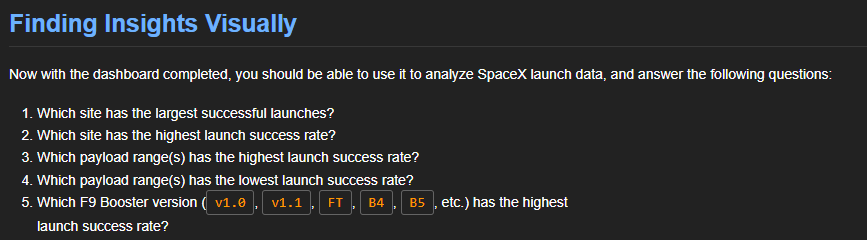